In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pypl
import seaborn as sd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
vehi_df = pd.read_csv('vehicles.csv')

In [3]:
vehi_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
vehi_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
vehi_df = vehi_df[['price', 'year', 'manufacturer',
                    'condition', 'cylinders', 'fuel', 'odometer', 'title_status','drive',
                   'transmission','size', 'type', 'paint_color']]

In [6]:
vehi_cols = [cols for cols in vehi_df.columns if vehi_df[cols].dtypes == 'O']
vehi_cols

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'drive',
 'transmission',
 'size',
 'type',
 'paint_color']

In [7]:
for cols in vehi_cols:
    print(vehi_df[cols].unique())

[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
[nan 'rwd' '4wd' 'fwd']
[nan 'other' 'automatic' 'manual']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 '

In [8]:
vehi_df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [9]:
vehi_df.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [10]:
vehi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   drive         296313 non-null  object 
 9   transmission  424324 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [11]:
vehi_df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [12]:
sort_pr = sorted(vehi_df['price'])

q1,q3 = np.percentile(sort_pr,[10,90])

vehi_df = vehi_df[(vehi_df.price > 500.0) & (vehi_df.price < 37590.0)]

<AxesSubplot:xlabel='odometer', ylabel='price'>

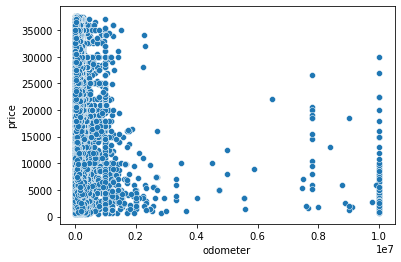

In [13]:
sd.scatterplot(x=vehi_df['odometer'],y=vehi_df['price'])

<AxesSubplot:xlabel='odometer', ylabel='price'>

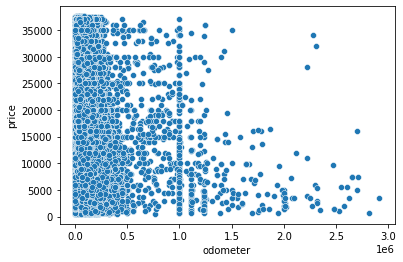

In [14]:
vehi_df['odometer'].max()

vehi_df = vehi_df[(vehi_df['odometer'] <3000000)]
sd.scatterplot(x=vehi_df['odometer'],y=vehi_df['price'])

In [15]:
vehi_df['year'] = vehi_df['year'].apply(lambda x : str(x).replace('.0',''))
vehi_df = vehi_df[vehi_df['year'] != 'nan']
vehi_df['year'] = vehi_df['year'].astype(int)

In [16]:
vehi_df = vehi_df[(vehi_df['year'] >= 1948) & (vehi_df['year'] <= 2020)]

In [17]:
null_vals = pd.DataFrame(vehi_df.isnull().sum(),columns=['null'])
null_vals['percent'] = round((null_vals['null']/len(vehi_df))*100,3)
null_vals.sort_values(by='percent',ascending=False)

,null,percent
size,236018,70.103
cylinders,134998,40.097
condition,122266,36.316
drive,103187,30.649
paint_color,97131,28.850
type,73527,21.839
manufacturer,11952,3.550
title_status,5782,1.717
fuel,1962,0.583
transmission,1285,0.382


In [18]:
def remove_null_values(vehi_df):
    
    vehi_df = vehi_df.dropna(subset=['size','manufacturer','fuel','transmission','title_status'])
    vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
    
    excellent_mean_odo = vehi_df[vehi_df['condition']=='excellent']['odometer'].mean()
    good_mean_odo = vehi_df[vehi_df['condition']=='good']['odometer'].mean()
    fair_mean_odo = vehi_df[vehi_df['condition']=='fair']['odometer'].mean()
    new_mean_odo = vehi_df[vehi_df['condition']=='new']['odometer'].mean()
    salvage_mean_odo = vehi_df[vehi_df['condition']=='salvage']['odometer'].mean()
    
    vehi_df.loc[vehi_df.year >= 2019, 'condition'] = vehi_df.loc[vehi_df.year >= 2019, 'condition'].fillna('new')
    vehi_df.loc[vehi_df['odometer'] <= new_mean_odo,'condition'] = vehi_df.loc[vehi_df['odometer'] <= new_mean_odo,'condition'].fillna('new')
    vehi_df.loc[((vehi_df['odometer'] > new_mean_odo) & (vehi_df['odometer'] <= good_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > new_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= good_mean_odo)) ,'condition']\
                                                                                                            .fillna('good')
    vehi_df.loc[((vehi_df['odometer'] > good_mean_odo) & (vehi_df['odometer'] <= excellent_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > good_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= excellent_mean_odo)) ,'condition']\
                                                                                                            .fillna('excellent')
    vehi_df.loc[((vehi_df['odometer'] > excellent_mean_odo) \
    & (vehi_df['odometer'] <= salvage_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > excellent_mean_odo) \
                                                           & (vehi_df['odometer'] <= salvage_mean_odo)) ,'condition']\
                                                           .fillna('salvage')
    vehi_df.loc[((vehi_df['odometer'] > salvage_mean_odo) & (vehi_df['odometer'] <= fair_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > salvage_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= fair_mean_odo)) ,'condition']\
                                                                                                            .fillna('fair')
    vehi_df.loc[vehi_df['odometer'] >= fair_mean_odo,'condition'] = vehi_df.loc[vehi_df['odometer'] >= fair_mean_odo,'condition'].fillna('fair')
    
    vehi_df['cylinders'] = vehi_df['cylinders'].fillna(method='ffill')
    vehi_df['drive'] = vehi_df['drive'].fillna(method='ffill')
    vehi_df['paint_color'] = vehi_df['paint_color'].fillna(method='ffill')
    vehi_df['type'] = vehi_df['type'].fillna(method='ffill')
    
    vehi_df = vehi_df.dropna()
    return vehi_df

In [19]:
null_vals = pd.DataFrame(vehi_df.isnull().sum(),columns=['null'])
null_vals['percent'] = round((null_vals['null']/len(vehi_df))*100,3)
null_vals.sort_values(by='percent',ascending=False)

,null,percent
size,236018,70.103
cylinders,134998,40.097
condition,122266,36.316
drive,103187,30.649
paint_color,97131,28.850
type,73527,21.839
manufacturer,11952,3.550
title_status,5782,1.717
fuel,1962,0.583
transmission,1285,0.382


In [20]:
vehi2_df = remove_null_values(vehi_df)

<ipython-input-18-573beb29ff4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

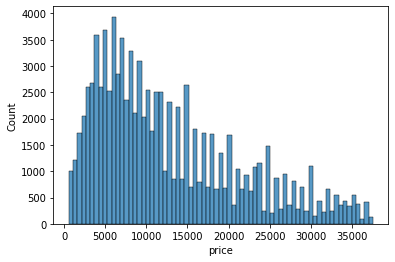

In [21]:
# pypl.hist(x=vehi_df['year'],bins=20)
sd.histplot(vehi2_df['price'])
pypl.show()

In [22]:
vehi2_df.describe()

,price,year,odometer
count,96170.000000,96170.000000,9.617000e+04
mean,12610.302735,2008.710918,1.191431e+05
std,8762.959113,9.023656,8.365787e+04
min,550.000000,1948.000000,0.000000e+00
25%,5805.250000,2006.000000,7.400000e+04
50%,9995.000000,2011.000000,1.132580e+05
75%,17900.000000,2014.000000,1.549690e+05
max,37587.000000,2020.000000,2.915272e+06


<AxesSubplot:xlabel='cylinders', ylabel='count'>

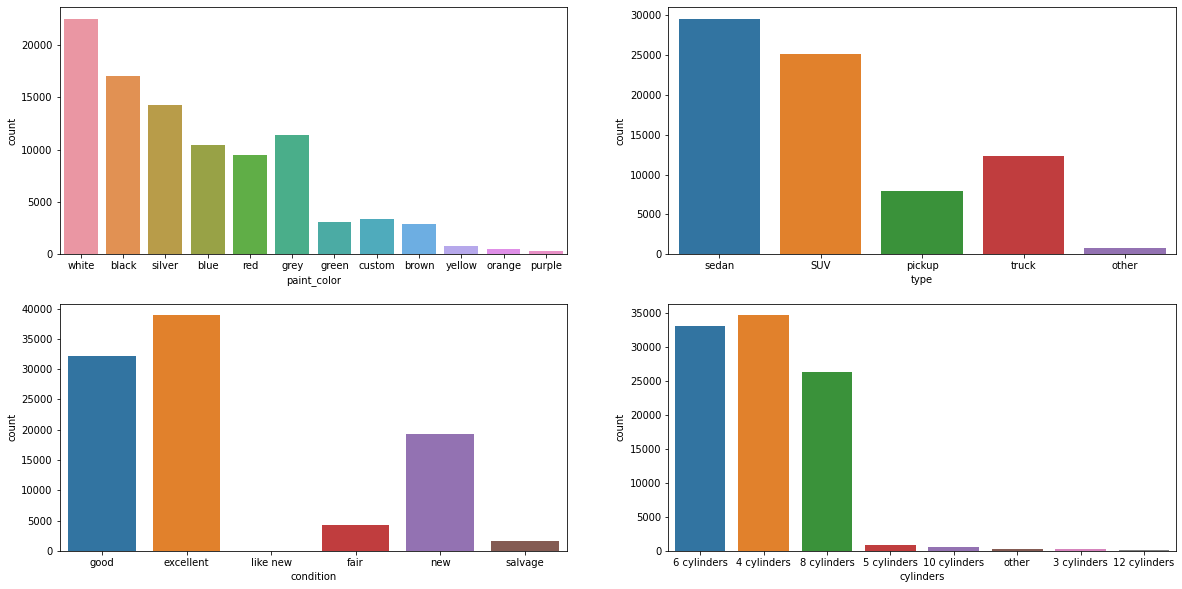

In [23]:
fig, ax = pypl.subplots(2,2,figsize=(20,10))
sd.countplot(x='paint_color',data=vehi2_df,ax=ax[0][0],order=vehi_df['paint_color'].value_counts().index)
sd.countplot(x='type',data=vehi2_df,order=vehi_df['type'].value_counts()[:5].index,ax=ax[0][1])
sd.countplot(x='condition',data=vehi2_df,ax=ax[1][0],order=vehi_df['condition'].value_counts().index)
sd.countplot(x='cylinders',data=vehi2_df,ax=ax[1][1],order=vehi_df['cylinders'].value_counts().index)

<AxesSubplot:xlabel='size', ylabel='count'>

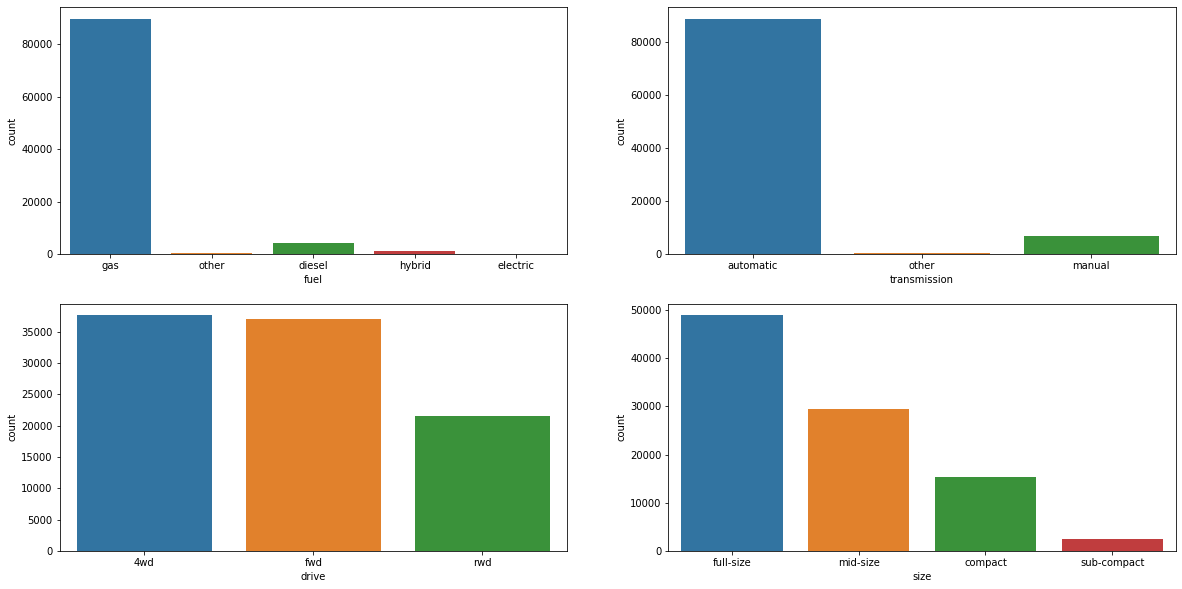

In [24]:
fig2, ax2 = pypl.subplots(2,2,figsize=(20,10))
sd.countplot(x='fuel',data=vehi2_df,ax=ax2[0][0],order=vehi_df['fuel'].value_counts().index)
sd.countplot(x='transmission',data=vehi2_df,ax=ax2[0][1],order=vehi_df['transmission'].value_counts().index)
sd.countplot(x='drive',data=vehi2_df,ax=ax2[1][0],order=vehi_df['drive'].value_counts().index)
sd.countplot(x='size',data=vehi2_df,ax=ax2[1][1],order=vehi_df['size'].value_counts().index)

<AxesSubplot:xlabel='cylinders', ylabel='price'>

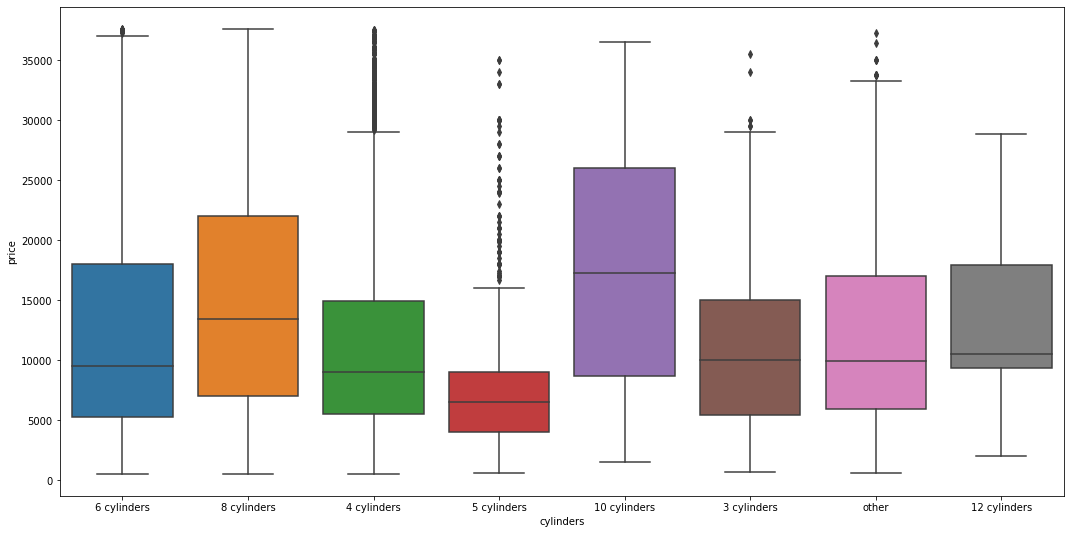

In [25]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='cylinders',y='price',data=vehi2_df)

<AxesSubplot:xlabel='condition', ylabel='price'>

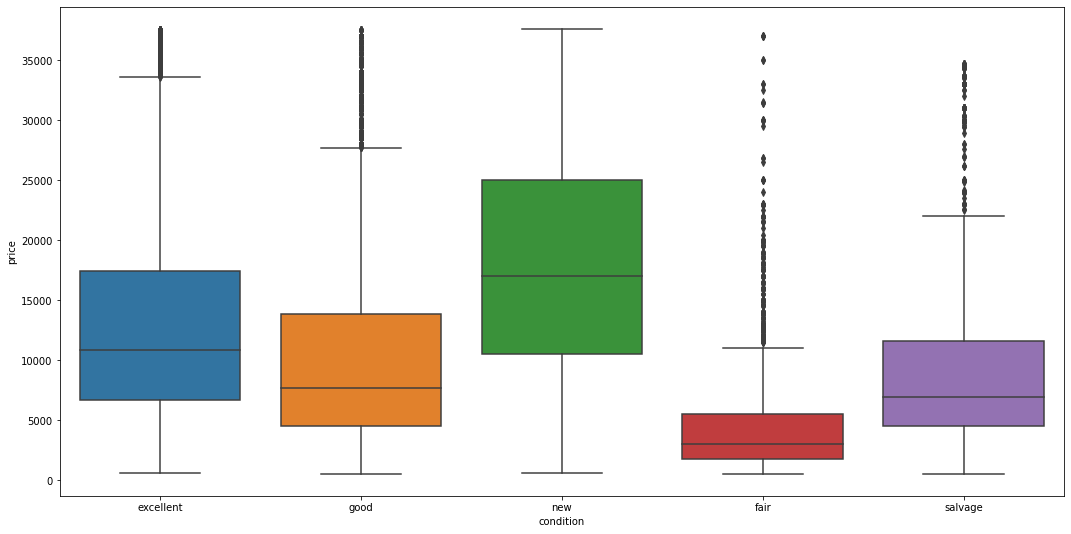

In [26]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='condition',y='price',data=vehi2_df)

<AxesSubplot:xlabel='type', ylabel='price'>

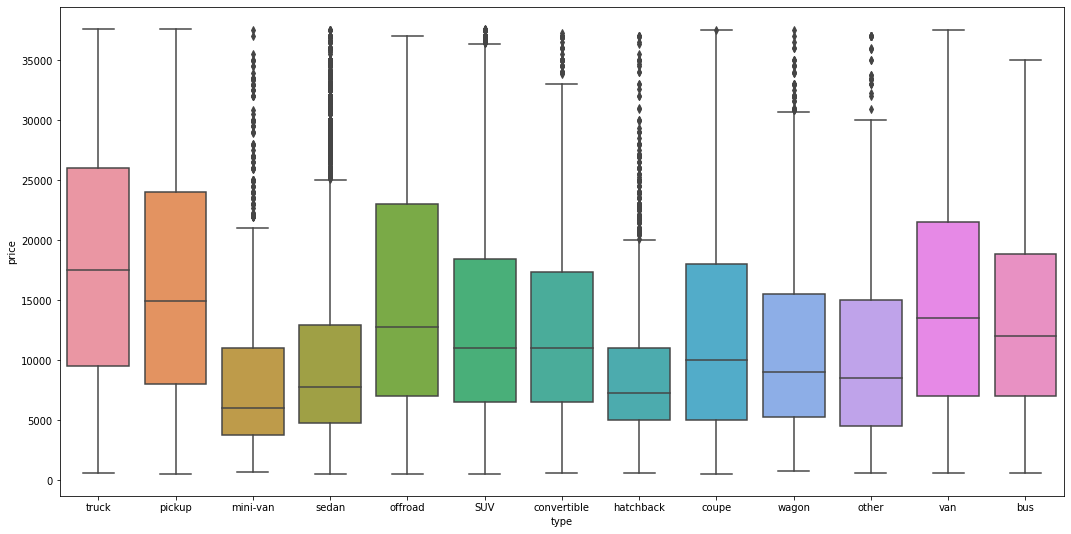

In [27]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='type',y='price',data=vehi2_df)

<AxesSubplot:xlabel='size', ylabel='price'>

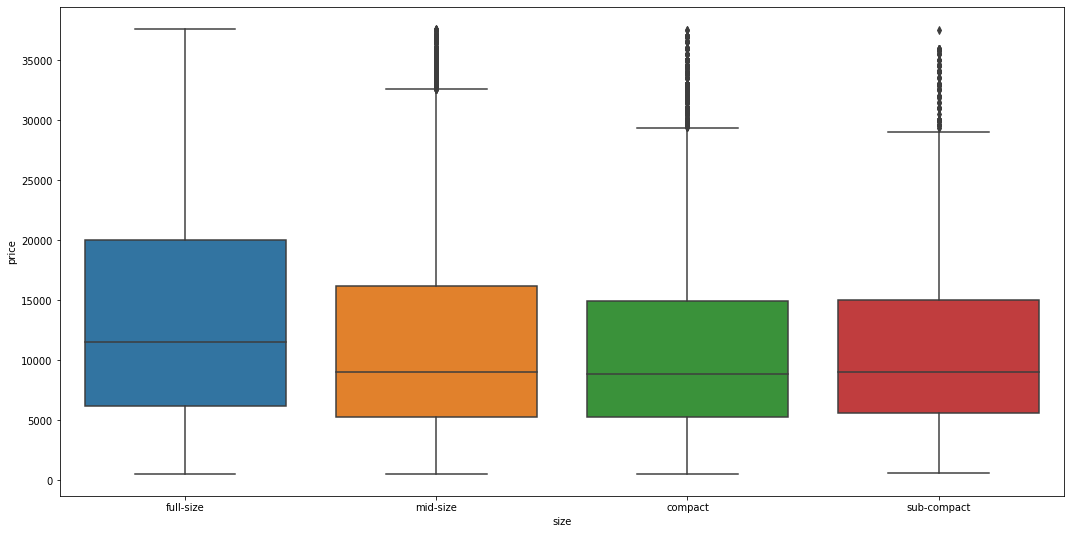

In [28]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='size',y='price',data=vehi2_df)

<AxesSubplot:xlabel='fuel', ylabel='price'>

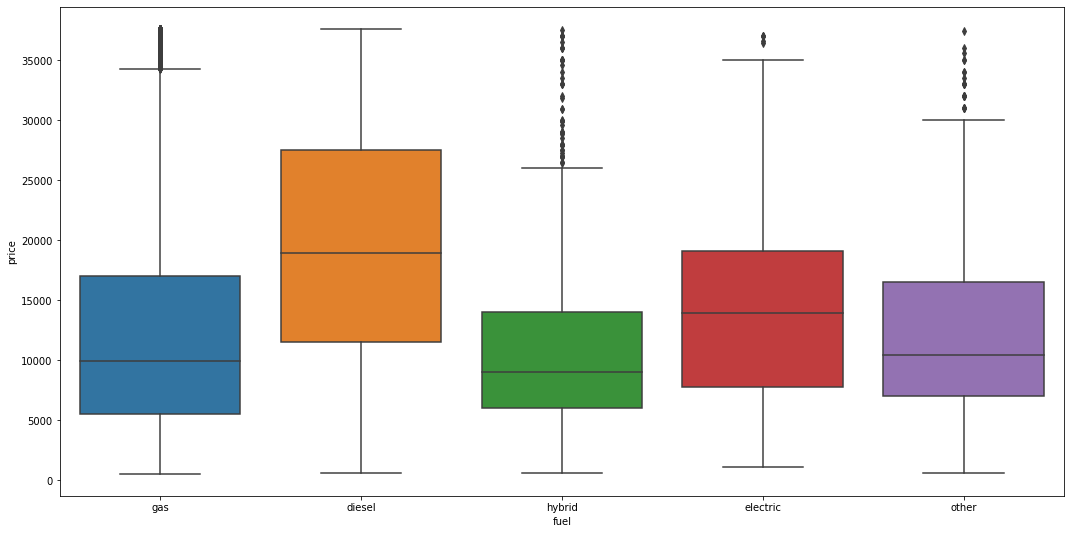

In [29]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='fuel',y='price',data=vehi2_df)

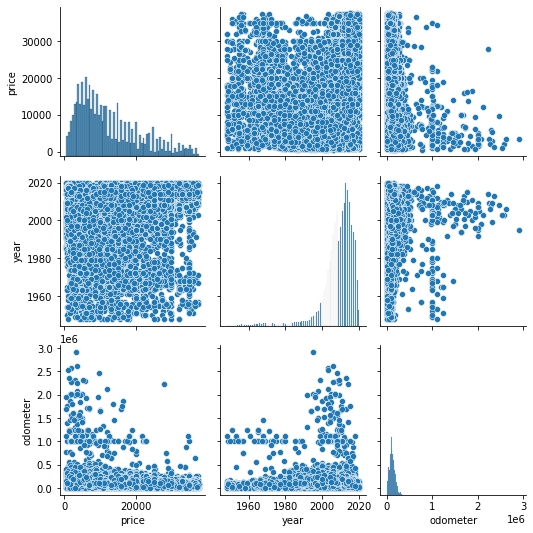

In [30]:
sd.pairplot(vehi2_df)

In [31]:
from sklearn.preprocessing import LabelEncoder

lbc = LabelEncoder()

category_cols = list(vehi2_df.dtypes[vehi2_df.dtypes == object].index)

for cols in category_cols:
    vehi2_df[cols] = lbc.fit_transform(vehi2_df[cols])

<AxesSubplot:>

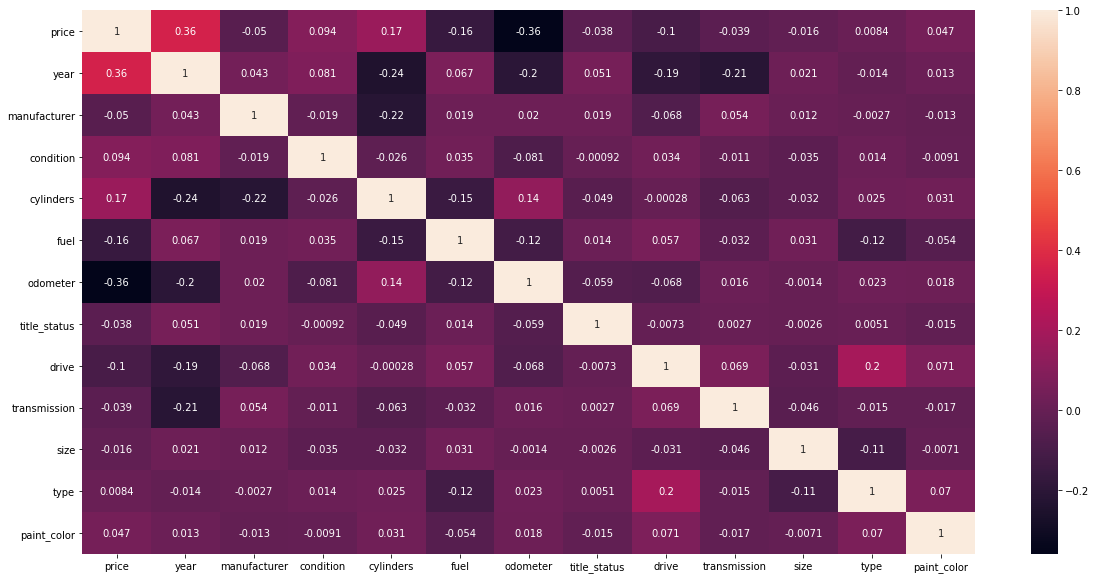

In [32]:
pypl.figure(figsize=(20,10))
corr = vehi2_df.corr()
sd.heatmap(pd.DataFrame(corr),annot=True)

### Data Preprocessing

In [33]:
Q1 = vehi_df.quantile(0.25)
Q3 = vehi_df.quantile(0.75)

IQR = Q3 - Q1

In [34]:
vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-34-2b37def7e195>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-34-2b37def7e195>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(vehi2_df.drop(['price'],axis=1))

def preprocess_data(vehi_df):
    
    # vehi_df = vehi_df.drop(['state'],axis=1)
    vehi_df = vehi_df[vehi_df['cylinders'] != 'other']
    vehi_df['cylinders'] = vehi_df['cylinders'].apply(lambda x : x.replace(' cylinders',''))
    # vehi_df['cylinders'] = vehi_df['cylinders'].astype(int)
    
    grades = {'excellent':5,'good':4,'fair':3,'new':2,'salvage':1}

    vehi_df['condition'] = vehi_df['condition'].replace(grades)
    
    vehi_df = pd.get_dummies(vehi_df)
    # vehi_df = vehi_df.drop(category_cols,axis=1)
    
    # vehi_df = ohc.transform(vehi_df)
    
    return vehi_df

# vehi2_df = ohc.transform(vehi2_df)
# vehi2_df.toarray()

In [36]:
vehi_df = vehi_df[vehi_df['cylinders'] != 'other']
vehi_df = remove_null_values(vehi_df)

<ipython-input-18-573beb29ff4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [37]:
x = vehi_df.drop(['price'],axis=1)
y = vehi_df.price

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
x_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,drive,transmission,size,type,paint_color
301999,2014,chevrolet,good,4 cylinders,gas,258200.0,clean,fwd,automatic,mid-size,sedan,brown
67263,2002,ford,fair,6 cylinders,gas,159200.0,clean,rwd,automatic,mid-size,coupe,black
112653,2017,nissan,excellent,4 cylinders,gas,18900.0,clean,rwd,automatic,mid-size,pickup,blue
280145,2006,gmc,excellent,6 cylinders,gas,89055.0,clean,4wd,manual,full-size,truck,blue
163639,2006,honda,excellent,4 cylinders,gas,119000.0,clean,fwd,automatic,sub-compact,sedan,red
...,...,...,...,...,...,...,...,...,...,...,...,...
66906,2004,toyota,excellent,4 cylinders,gas,139000.0,clean,rwd,automatic,mid-size,truck,red
197881,2008,saturn,excellent,6 cylinders,gas,69625.0,clean,fwd,automatic,mid-size,sedan,red
79596,2016,subaru,new,4 cylinders,gas,69733.0,clean,4wd,automatic,compact,sedan,blue
39581,2009,cadillac,excellent,8 cylinders,gas,78500.0,clean,rwd,automatic,full-size,sedan,grey


In [39]:
#x_train = remove_null_values(x_train)
x_train = preprocess_data(x_train)

#x_test = remove_null_values(x_test)
x_test = preprocess_data(x_test)

In [40]:
x_train

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
301999,2014,4,258200.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
67263,2002,3,159200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112653,2017,5,18900.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280145,2006,5,89055.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163639,2006,5,119000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66906,2004,5,139000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197881,2008,5,69625.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79596,2016,2,69733.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39581,2009,5,78500.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
x_test

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
330100,2007,3,173371.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296253,2008,2,125000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
386676,2011,4,170273.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
325660,2010,4,95090.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
245756,2012,5,96109.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,1999,4,210000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
324550,2007,3,142876.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78096,2018,2,35673.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286192,2014,2,138238.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LassoRegression

In [43]:
from sklearn.preprocessing import StandardScaler
x_test = x_test.reindex(x_train.columns, fill_value=0,axis=1)

In [44]:
stsc = StandardScaler()
stsc.fit(x_train)
x_train = stsc.transform(x_train)
x_test = stsc.transform(x_test)

In [45]:
x_test

array([[-0.58658623, -0.80997158,  1.00192443, ..., -0.42683496,
        -0.55497468, -0.08291824],
       [-0.40648423, -1.67828782,  0.15572818, ..., -0.42683496,
         1.80188402, -0.08291824],
       [ 0.13382178,  0.05834465,  0.94772841, ..., -0.42683496,
        -0.55497468, -0.08291824],
       ...,
       [ 1.39453582, -1.67828782, -1.40694722, ..., -0.42683496,
        -0.55497468, -0.08291824],
       [ 0.6741278 , -1.67828782,  0.38731211, ..., -0.42683496,
         1.80188402, -0.08291824],
       [-0.76668824, -0.80997158,  0.83798932, ..., -0.42683496,
        -0.55497468, -0.08291824]])

In [46]:
xgbr = XGBRegressor(random_state=42,objective='reg:squarederror')
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred = xgbr.predict(x_test)
r2_score(y_test,y_pred)

0.8491587623171061

Mean Absolute Error: 2360.56 degrees.
Accuracy for xgboost is : 68.54 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


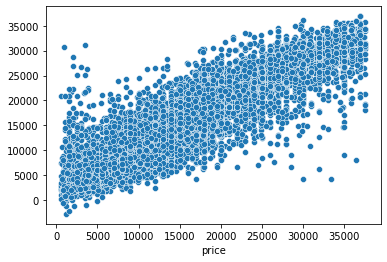

In [48]:
sd.scatterplot(y_test,y_pred)

lr_errors = abs(y_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for xgboost is :', round(lr_accuracy, 2), '%.')

In [49]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [50]:
lin_pred = linreg.predict(x_test)
r2_score(y_test,lin_pred)

0.7070435649213508

Mean Absolute Error: 3551.67 degrees.
Accuracy for xgboost is : 47.67 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


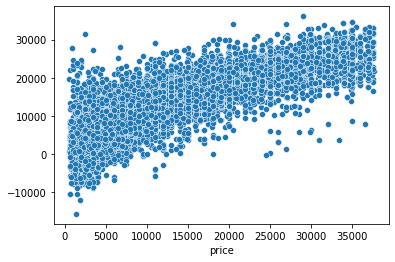

In [51]:
sd.scatterplot(y_test,lin_pred)

lr_errors = abs(lin_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for xgboost is :', round(lr_accuracy, 2), '%.')

In [52]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
rfr_pred = rfr.predict(x_test)
r2_score(y_test,rfr_pred)

0.8700606384070061

Mean Absolute Error: 1907.72 degrees.
Accuracy for RandomForestRegression is : 73.43 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


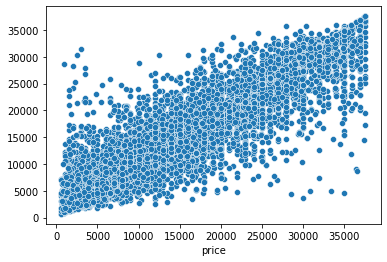

In [54]:
sd.scatterplot(y_test,rfr_pred)

lr_errors = abs(rfr_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for RandomForestRegression is :', round(lr_accuracy, 2), '%.')

In [55]:
from sklearn.model_selection import cross_val_score,cross_val_predict

cv_r2_scores_ln = cross_val_score(linreg, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_ln)
print('Mean score for linear Regresion: {}'.format(np.mean(cv_r2_scores_ln)),sep="\n")

cv_r2_scores_xg = cross_val_score(xgbr, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_xg)
print('Mean score for xgboost: {}'.format(np.mean(cv_r2_scores_xg)),sep="\n")

cv_r2_scores_rfr = cross_val_score(rfr, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_rfr)
print('Mean score for Random Forest Regression: {}'.format(np.mean(cv_r2_scores_rfr)),sep="\n")

[ 7.14631959e-01  7.04770784e-01  7.01103367e-01  7.12436684e-01
 -1.23656517e+23]
Mean score for linear Regresion: -2.473130342514981e+22
[0.84826441 0.84572584 0.84000475 0.84490971 0.85527398]
Mean score for xgboost: 0.8468357380638274
[0.8692183  0.8658439  0.86155095 0.86449903 0.87461018]
Mean score for Random Forest Regression: 0.8671444719713455


In [56]:
import pickle as pk
filename = 'carstd.sav'
pk.dump(stsc,open(filename,'wb'))

In [57]:
import optuna

def tree_run(trial):
    
    n_estimators = trial.suggest_int('n_estimators',10,500)
    max_depth = trial.suggest_int('max_depth',2,64)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',4,64)
    
    x_train,x_valid,y_train,y_valid = train_test_split(x,y)
    
    x_train = preprocess_data(x_train)
    x_valid = preprocess_data(x_valid)
    
    x_valid = x_valid.reindex(x_train.columns, fill_value=0,axis=1)
    
    stsc = StandardScaler()
    stsc.fit(x_train)
    x_train = stsc.transform(x_train)
    x_valid = stsc.transform(x_valid)
    
    rfr = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
    rfr.fit(x_train,y_train)
    rfr_pred = rfr.predict(x_valid)
    
    r2s = r2_score(y_valid,rfr_pred)
    return r2s

In [58]:
study = optuna.create_study(direction="maximize")
study.optimize(tree_run,n_trials=10)

[I 2022-05-18 08:46:09,316] A new study created in memory with name: no-name-c513c2ed-a395-402e-ae14-df9f256dd324
[I 2022-05-18 08:47:28,849] Trial 0 finished with value: 0.7633366501968909 and parameters: {'n_estimators': 348, 'max_depth': 25, 'min_samples_leaf': 64}. Best is trial 0 with value: 0.7633366501968909.
[I 2022-05-18 08:48:50,037] Trial 1 finished with value: 0.761935193947097 and parameters: {'n_estimators': 369, 'max_depth': 35, 'min_samples_leaf': 60}. Best is trial 0 with value: 0.7633366501968909.
[I 2022-05-18 08:49:16,388] Trial 2 finished with value: 0.7802588763059707 and parameters: {'n_estimators': 110, 'max_depth': 23, 'min_samples_leaf': 43}. Best is trial 2 with value: 0.7802588763059707.
[I 2022-05-18 08:50:02,112] Trial 3 finished with value: 0.765751881296291 and parameters: {'n_estimators': 197, 'max_depth': 34, 'min_samples_leaf': 60}. Best is trial 2 with value: 0.7802588763059707.
[I 2022-05-18 08:52:10,519] Trial 4 finished with value: 0.8226092357007

In [61]:
rfr = RandomForestRegressor(n_estimators = 438, max_depth = 42, min_samples_leaf = 13)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=42, min_samples_leaf=13, n_estimators=438)

In [62]:
import joblib
joblib.dump(rfr,'carpred.pkl',compress=7)

['carpred.pkl']